In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as stm

### Loading and studying data

In [3]:
df = pd.read_csv('prepared_data.csv', 
                 parse_dates=["date"], 
                 infer_datetime_format=True).drop_duplicates()

df = df.set_index('date')
df["% Silica Concentrate"][:5]

date
2017-03-10 01:00:00    1.31
2017-03-10 02:00:00    1.11
2017-03-10 03:00:00    1.27
2017-03-10 04:00:00    1.36
2017-03-10 05:00:00    1.34
Name: % Silica Concentrate, dtype: float64

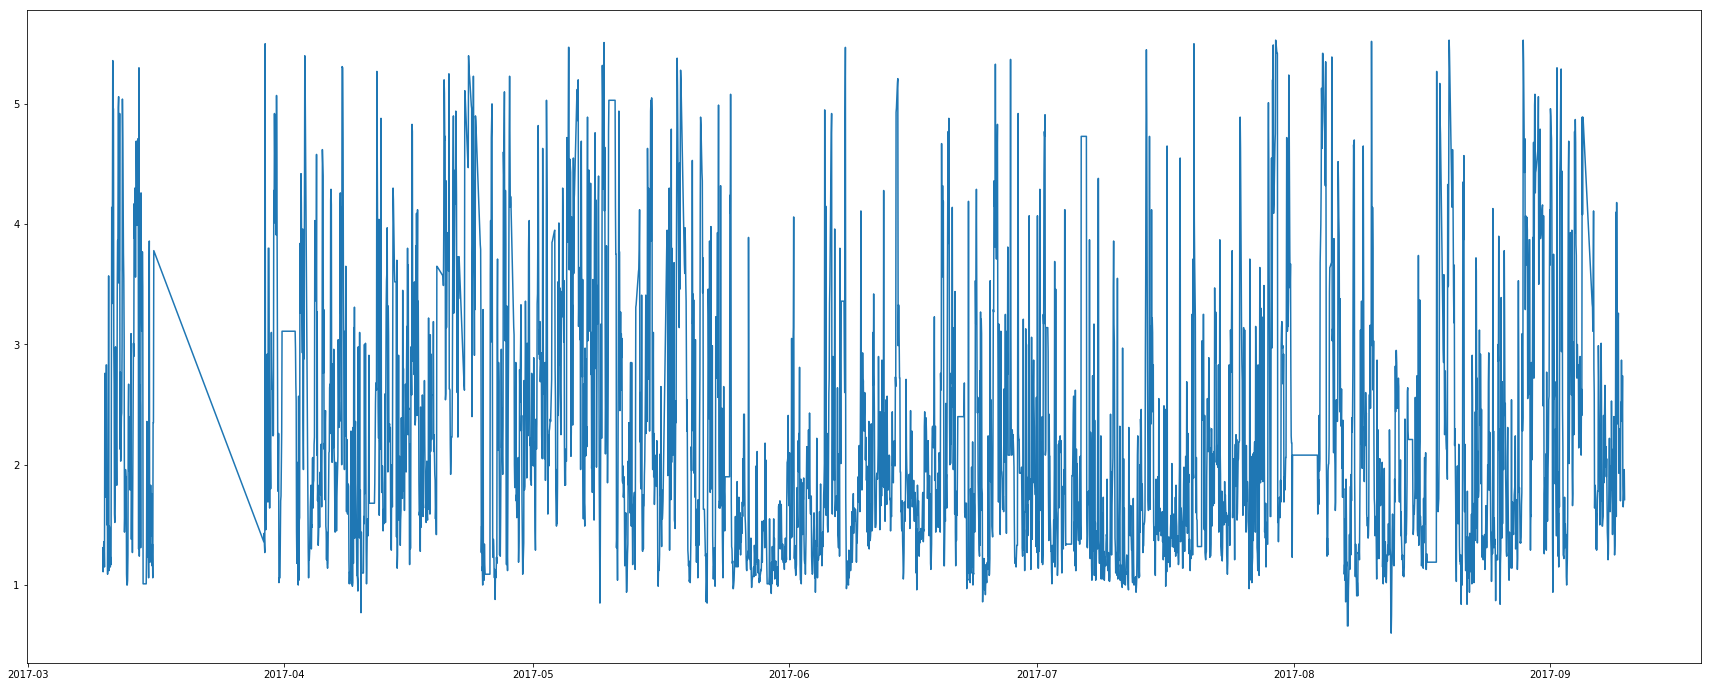

In [4]:
series = df["% Silica Concentrate"]

plt.figure(figsize=(30, 12))
plt.plot(series)

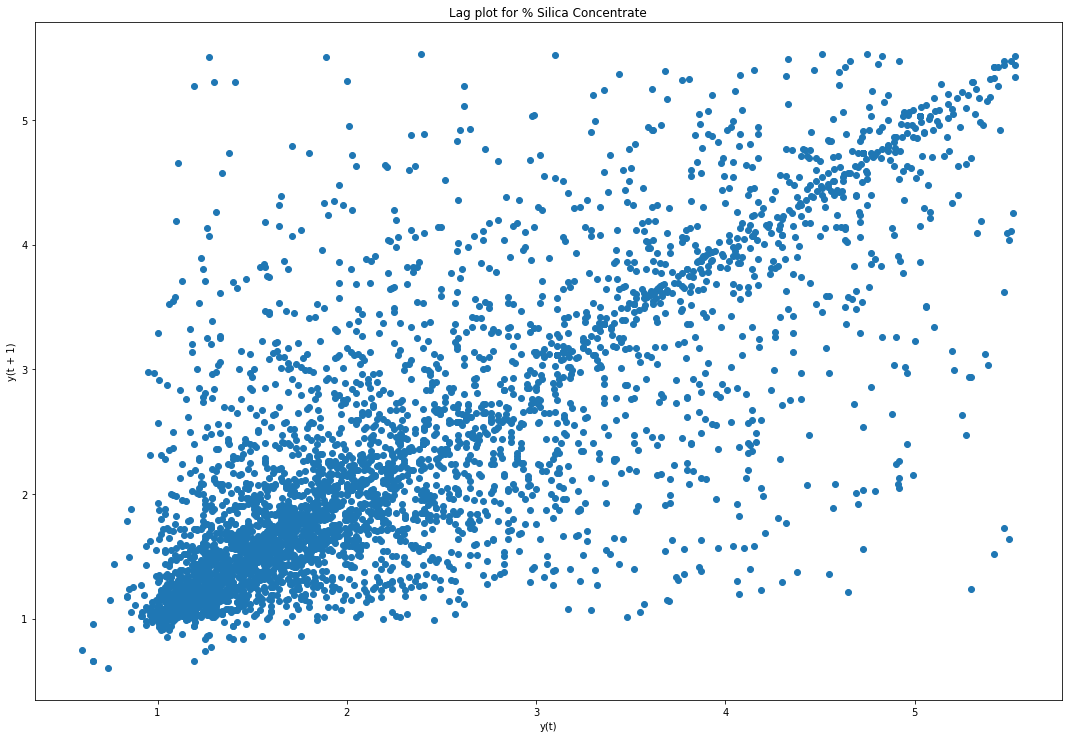

In [13]:
from pandas.plotting import lag_plot

f1, (ax1) = plt.subplots(1, figsize=(15, 10))
f1.tight_layout()

lag_plot(series, ax=ax1)
ax1.set_title('Lag plot for % Silica Concentrate')

plt.show()

Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.

In [6]:
def tsplot(y, lags=None, figsize=(15, 12), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = stm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        stm.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        stm.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

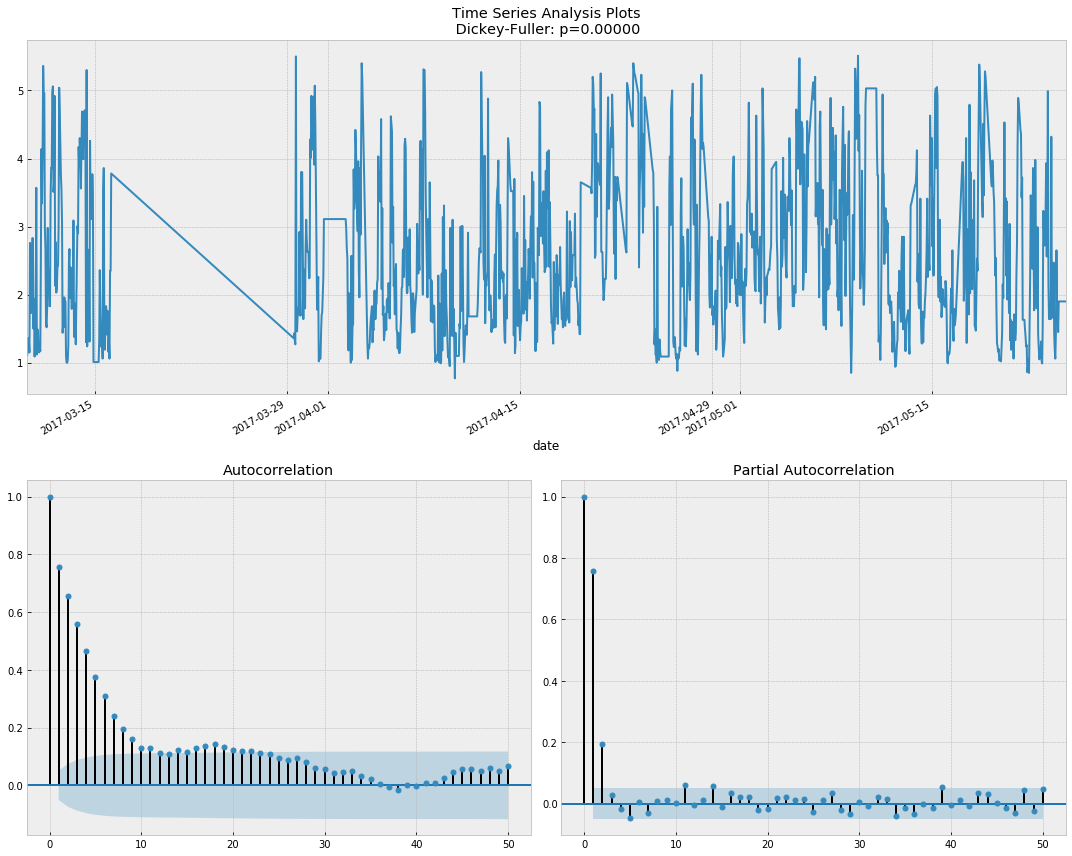

In [7]:
tsplot(series[:1500], lags=50)

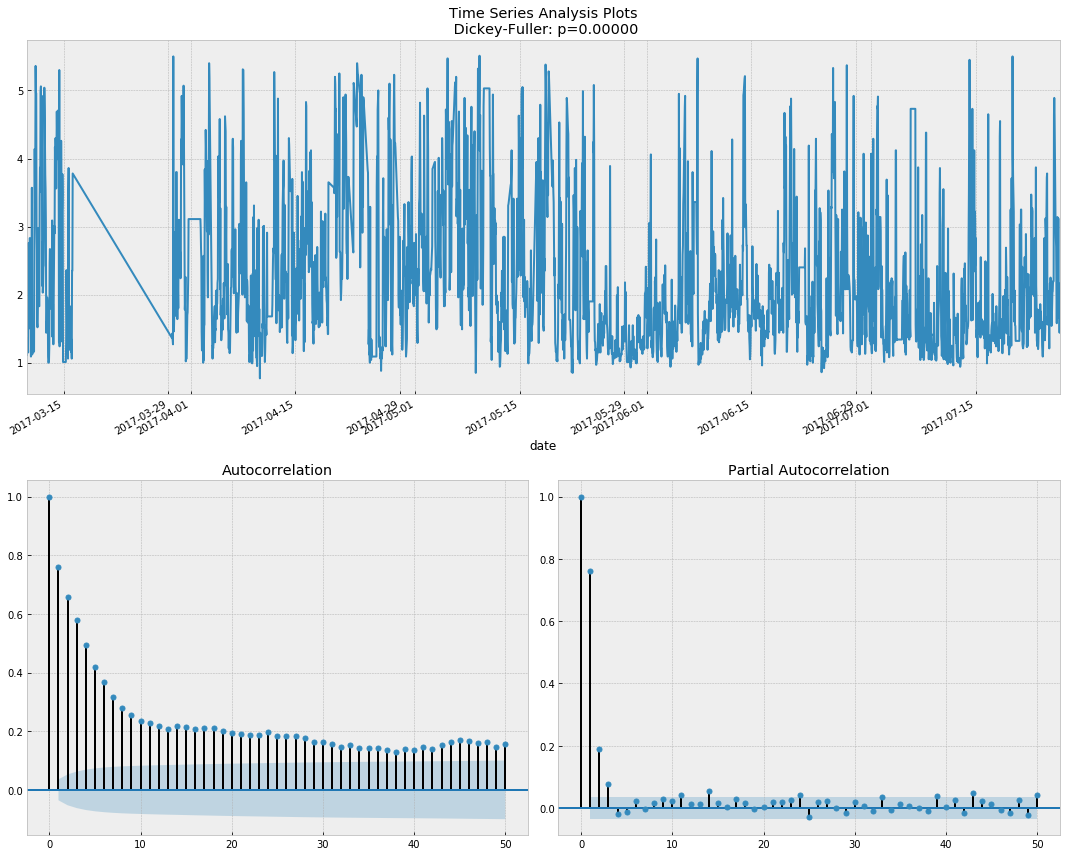

In [8]:
tsplot(series[:3000], lags=50)

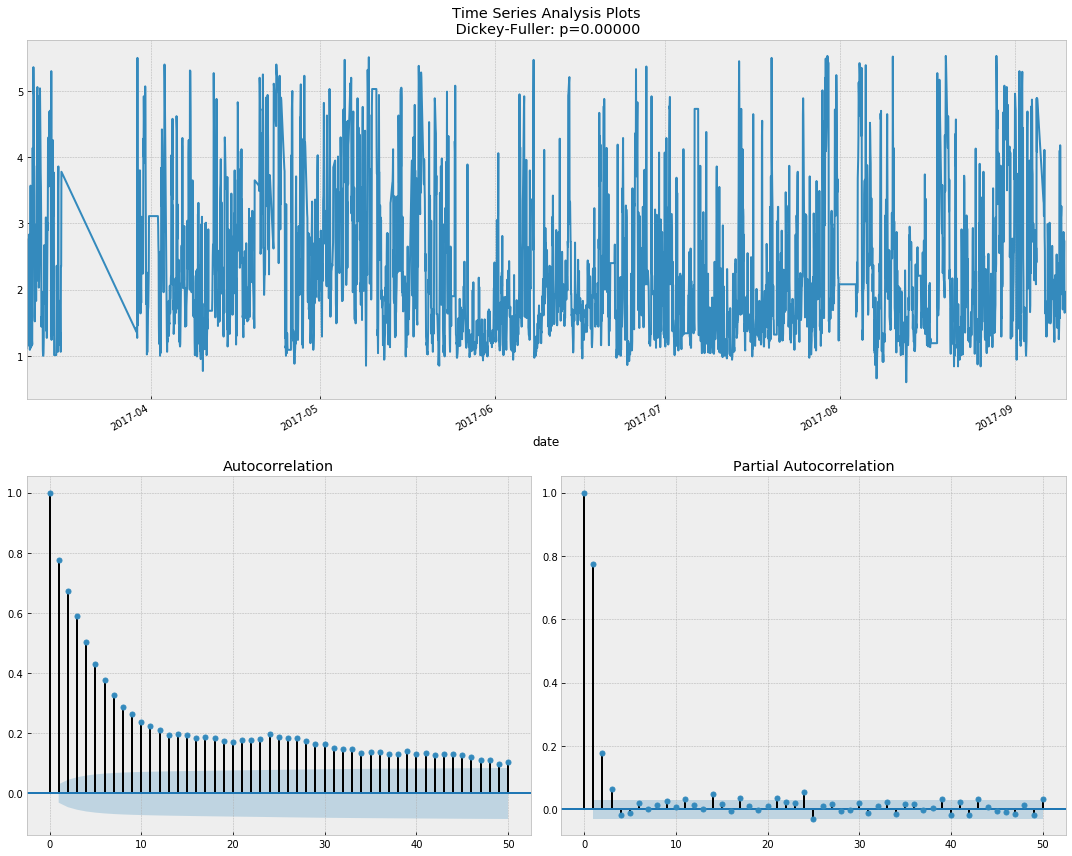

In [9]:
tsplot(series[:5000], lags=50)

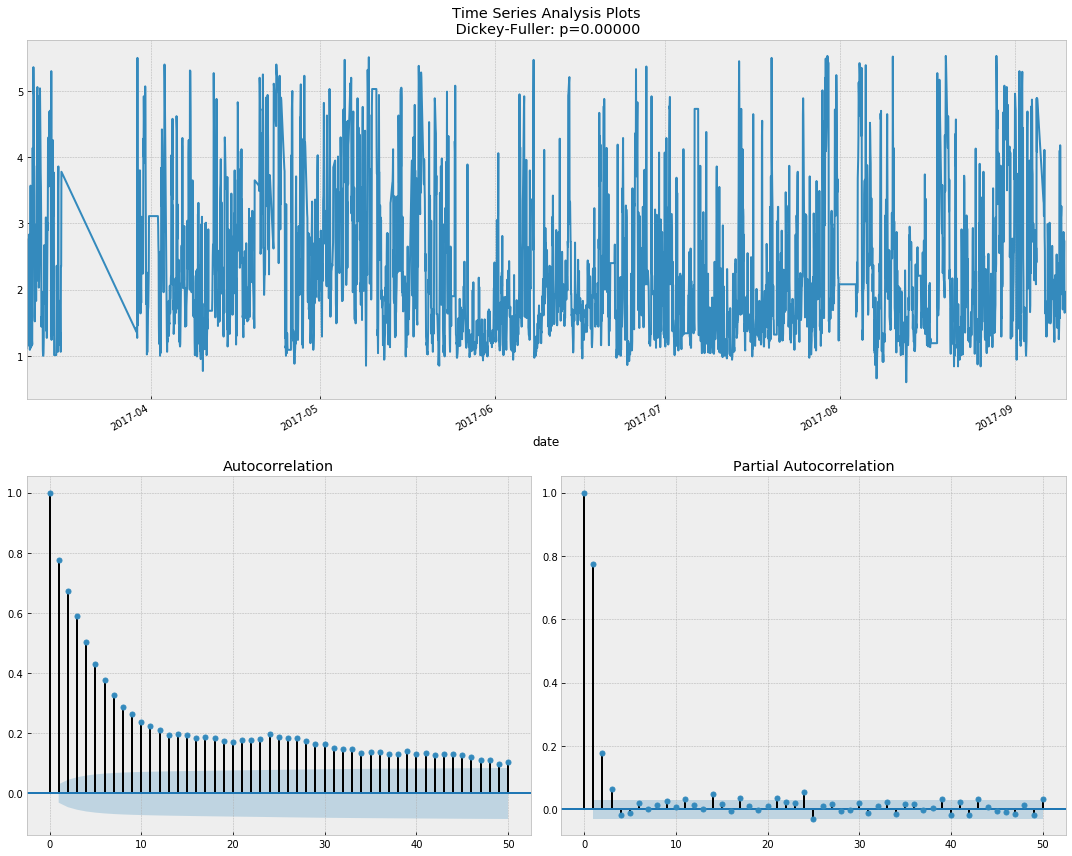

In [10]:
tsplot(series[:10000], lags=50)

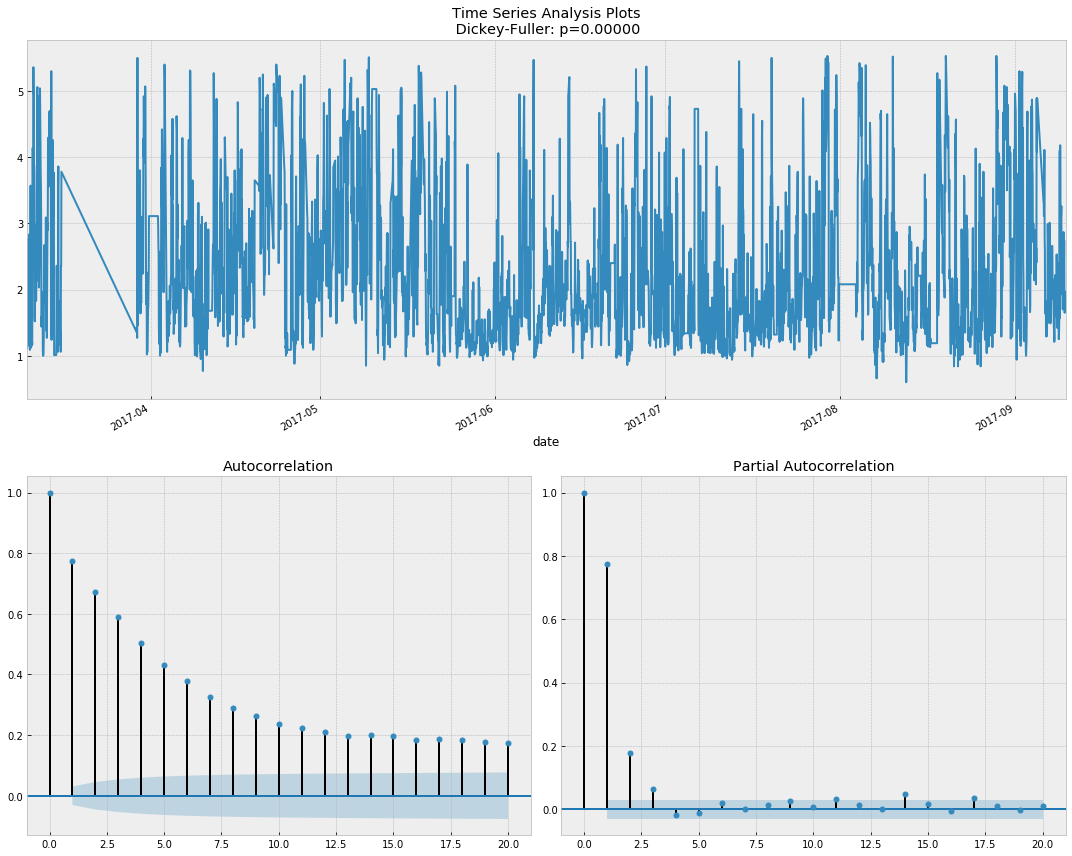

In [11]:
tsplot(series, lags=20)

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.